In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

In [4]:
#1 Chargement du dataset Titanic (titanic.csv)

df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#2 Prétraitement des données
# Traitement des valeurs manquantes (âge, embarked)
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

# Supprimer les colonnes non utiles
df_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encodage des variables catégorielles
df_titanic = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'], drop_first=True)


/tmp/ipykernel_11455/4271565457.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
/tmp/ipykernel_11455/4271565457.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [6]:
#3 Entraînement du modèle XGBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Séparation des données
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Évaluation du modèle
y_pred = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/home/chadnel-linux/miniconda3/envs/datascience/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:30:01] WARNING: /croot/xgboost-split_1724073744422/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



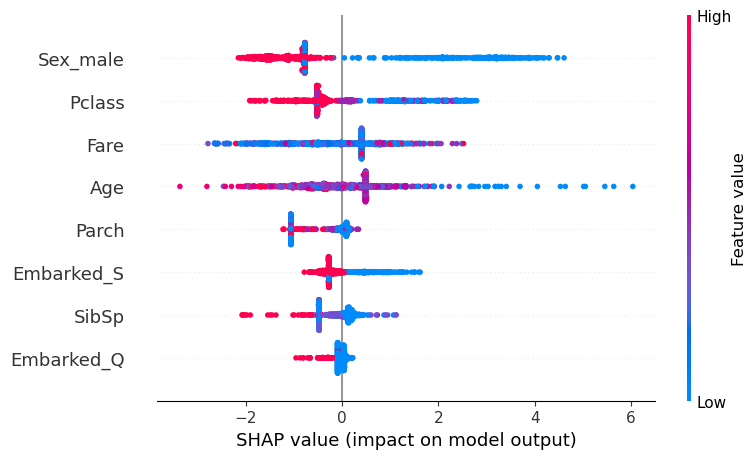

In [9]:
#4 Interprétation SHAP
import shap

# SHAP values
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X)

# Visualisation globale des importances
shap.summary_plot(shap_values, X)


In [11]:
#5 Variable la plus influente sur la survie des passagers ?
Généralement : "Sex" ou "Age" (femmes et enfants priorisés pour la survie sur le Titanic).

SyntaxError: invalid syntax (1730346104.py, line 2)

In [ ]:
#6 HAP est-il plus informatif qu’un simple feature_importances_ ?
Oui, SHAP fournit une analyse détaillée :

Direction de l'effet (positif/négatif).

Impact sur chaque prédiction individuelle (interprétation locale).

Plus informatif que feature_importances_, qui ne donne qu'une importance globale sans indication directionnelle.

